# Clustering of the N2 dataset

The N2 dataset shows one cluster, supporting the hypothesis that N2 lacks informative features.  N2 has two ground truth classes. and should show two clusters.  The adjusted rand index is zero, indicating that the identified clustering and ground truth, y, are in disagreement.

In [19]:
# Adapted by Rolf Carlson from
# (1) A demo of K-Means clustering on the handwritten digits data 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [20]:
import pandas

In [21]:
input_file_path = "../../../data/n2.csv"
df = pandas.read_csv(input_file_path, header=0, sep=",")
X = df.loc[:, df.columns != 'ctrl/case']
Y = df['ctrl/case']

## Cluster analysis

Clustering is an unsupervised method that may help reveal the number of true classes in the psych data.
There is only one cluster observed.  We should get at least two clusters.

In [22]:
from nltk.metrics.distance import edit_distance
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn import metrics

# Standardize the feature matrix
X_s = StandardScaler().fit_transform(X.to_numpy())

# Get the ground truth labels
labels_true = Y.values.tolist()
clust = OPTICS(min_samples=10, min_cluster_size=0.2)

# Run the fit and get the labels
clust.fit(X)
labels = clust.labels_

df_label = pd.DataFrame(zip(labels_true, labels), columns=['Truth', 'Observed'])
print(df_label)

# 37, or about half are different
print('Label edit distance ', edit_distance(labels, labels_true))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
# print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

    Truth  Observed
0       0         0
1       0         0
2       0         0
3       0         0
4       0         0
..    ...       ...
67      1         0
68      1         0
69      1         0
70      1         0
71      1         0

[72 rows x 2 columns]
Label edit distance  32
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


## Visualize the results on PCA-reduced data

"PCA allows to project the data from the original [135]-dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space."  https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

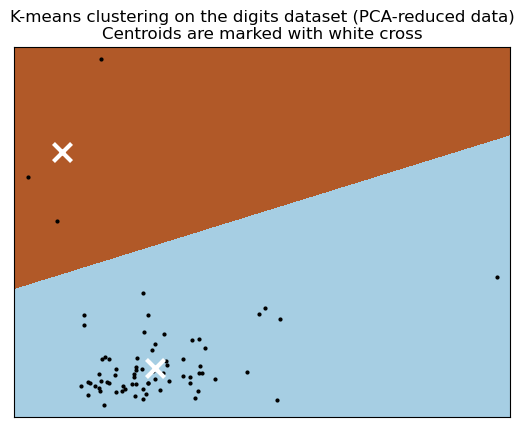

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=4)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()